## 데이터 분석과 머신러닝 실습 4 : 회귀(Regression)

<div style="text-align: right"> 작성자 : 데이터사이언스연구소 유광명, 이영생, 임혜원
</div>  

---

### 실습 4.1 Boston housing 문제
---
보스턴 지역의 주택정보 데이터를 바탕으로 주택 가격을 예측하는 모델 만들기 

<img src="img/boston.png" width="800">

**1) 머신러닝 모델**  
선형회귀(Linear regression)

**라이브러리 import**

In [1]:
import numpy as np #numpy
import pandas as pd #pandas

from sklearn.model_selection import train_test_split

**데이터 읽어오기 및 기본정보 확인**  
사이킷런 라이브러리 내부에서 데이터 셋 읽어오기

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

데이터는 'Bunch' 형태로 구성되어 있다.

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

DESCR 메서드는 데이터셋의 설명정보가 담겨있다.

In [6]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

data 메서드로 피처 데이터에 접근 가능하다.

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

target 메서드로 타겟 데이터에 접근 가능하다.

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

피처명은 feature_names 컬럼에 저장되어 있다.

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

피처 데이터를 데이터프레임으로 저장한다.

In [10]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


데이터에 타겟 값을 'PRICE' 컬럼에 추가한다.

In [12]:
data['PRICE'] = boston.target

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
data.shape

(506, 14)

**데이터 전처리 및 학습/ 시험 데이터 나누기**  
- 데이터 셋을 입력(피처)과 출력(타겟)으로 나눈다.
- 학습 데이터와 시험(검증) 데이터로 분리한다.

In [15]:
X = data.iloc[:, 0:13]
y = data.iloc[:, 13]

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state = 7,test_size = 0.3)

**모델학습(Training)**  
학습용 데이터(X_train, y_train)로 모델을 학습시킨다.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linreg = LinearRegression()

In [21]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**성능평가(Evaluation)**  
시험용 데이터(X_test, y_test)로 모델 성능을 평가한다.

In [22]:
linreg.score(X_train, y_train)

0.7613288901253087

In [23]:
linreg.score(X_test, y_test)

0.6508417720329555

### 실습 4.2 Boston housing 문제 2
---
앙상블 모델을 사용하여 과소적합을 개선한다. 

**1) 랜덤 포레스트 모델**

<img src="img/rf.png" width="500">

**데이터 전처리 및 학습/ 시험 데이터 나누기**  
- 데이터 셋을 입력(피처)과 출력(타겟)으로 나눈다.
- 학습 데이터와 시험(검증) 데이터로 분리한다.

In [24]:
X = data.iloc[:, 0:13]
y = data.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state = 7,test_size = 0.3)

**모델학습(Training)**  
학습용 데이터(X_train, y_train)로 모델을 학습시킨다.

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rfr = RandomForestRegressor(random_state=7)

In [27]:
rfr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=7, verbose=0, warm_start=False)

**성능평가(Evaluation)**  
시험용 데이터(X_test, y_test)로 모델 성능을 평가한다.

In [28]:
rfr.score(X_train, y_train)

0.9630431089671442

In [29]:
rfr.score(X_test, y_test)

0.794647277728811

**2) 그래디언트 부스팅 모델**

<img src="img/gbr.png" width="500">

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
gbr = GradientBoostingRegressor(random_state=7)

In [32]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
gbr.score(X_train, y_train)

0.9823391224838423

In [34]:
gbr.score(X_test, y_test)

0.8673937530774127

**특성 중요도(Feature importance**

In [35]:
feature_importance = pd.Series(gbr.feature_importances_)
feature_importance.index = boston.feature_names

In [36]:
feature_importance.sort_values().plot(kind = 'barh', figsize = (12, 6))

**3) 하이퍼 파라미터 튜닝**  
그래디언트 부스팅 모델의 최적의 max_depth 찾기

In [37]:
scores = []
for depth in range(1, 13):
    gbr = GradientBoostingRegressor(max_depth = depth, random_state=7)
    gbr.fit(X_train, y_train)
    train_score = gbr.score(X_train, y_train)
    test_score = gbr.score(X_test, y_test)
    scores.append((train_score, test_score))

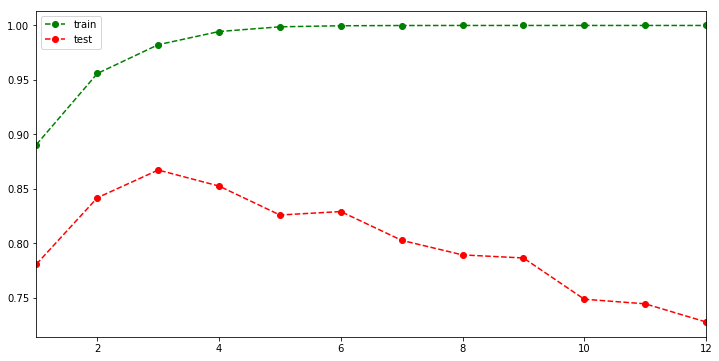

In [38]:
result = pd.DataFrame(scores, columns=['train', 'test'])
result.index = range(1, 13)
result.plot(style = ['go--', 'ro--'], figsize = (12, 6))